In [ ]:
# 0. load SMPL model
import easymocap
from easymocap.smplmodel import load_model
load_model
load_model(gender='male', use_cuda=True, model_type='smpl', skel_type='body25', device=None, model_path='data/smpl/')

In [ ]:
import easymocap.dataset
from easymocap.dataset.base import read_smpl
from easymocap.smplmodel import body_model
# 1. load parameters
#read_smpl('smpl/smpl/')
infos = read_smpl('smpl/smpl/000000.json')
# 2. compute joints
joints = body_model(return_verts=False, return_tensor=False, **info)[0]
# 3. compute vertices
vertices = body_model(return_verts=True, return_tensor=False, **info)[0]

In [ ]:
#import pyrender # first import the pyrender
from collections import namedtuple
import numpy as np
from easymocap.mytools.reader import read_smpl
import os
import json
from easymocap.dataset.base import MVBase
from easymocap.dataset.config import CONFIG
# 0. load SMPL model
from easymocap.smplmodel import load_model
from os.path import join
from easymocap.mytools.cmd_loader import load_parser
from easymocap.config import Config, load_object

#parser = load_parser()
#parser.add_argument('--gender', type=str, default='neutral', choices=['male', 'female', 'neutral'])
#parser.add_argument('--model', type=str, default='smpl', choices=['none', 'smpl', 'smplx'])
#args = parser.parse_args()

#body_model = load_model(args.gender, model_type=args.model)
# 1. load parameters
nf=0
step=0
smpl_output_path='smpl/smpl'
def read_json(path):
    with open(path) as f:
        data = json.load(f)
    return data
def read_smpl(nf):
        outname = join(smpl_output_path, '{:06d}.json'.format(nf))
        assert os.path.exists(outname), outname
        datas = read_json(outname)
        outputs = []
        for data in datas:
            for key in ['Rh', 'Th', 'poses', 'shapes']:
                data[key] = np.array(data[key])
            outputs.append(data)
        return outputs
infos = read_smpl(nf*step)
#print(infos)
'''
[{'id': 0, 'Rh': array([[ 1.279, -1.263, -1.197]]), 'Th': array([[0.42 , 0.285, 1.168]]), 'poses': array([[ 0.   ,  0.   ,  0.   , -0.067,  0.093,  0.162, -0.147, -0.082,
        -0.096,  0.   ,  0.   , -0.   ,  0.022,  0.044, -0.073,  0.094,
        -0.049,  0.042, -0.   ,  0.   ,  0.   , -0.043,  0.136, -0.004,
        -0.004, -0.144,  0.024,  0.034,  0.   ,  0.   , -0.   ,  0.   ,
        -0.   ,  0.   ,  0.   , -0.   , -0.288,  0.39 ,  0.043,  0.   ,
         0.   ,  0.   , -0.   ,  0.   ,  0.001,  0.281,  0.353,  0.019,
        -0.03 , -0.1  , -0.368, -0.027,  0.071,  0.426, -0.018, -0.158,
         0.065, -0.01 ,  0.091,  0.013, -0.   ,  0.   ,  0.   ,  0.   ,
        -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   ]]), 'shapes': array([[ 0.188, -0.178,  0.054,  0.178,  0.027,  0.035, -0.021, -0.022,
         0.018, -0.015]])}]
'''
for info in infos:
    #config = Config.load(args.cfg)
    #the following line has no effect??
    body_model=load_model('male','smpl')
    #body_model = load_object(config.module, config.args)
# 2. compute joints
    #params = body_model.init_params(1)
    pose=info["poses"]
    Rh=info["Rh"]
    Th=info["Th"]
    shapes=info["shapes"]
    #global_orient = pose[:, :3]
#taking the global orientation of the body (the first 3 columns of the pose matrix)
    #body_pose = pose[:, 3:]
    body_pose=pose
#taking the body pose (from the 4th columns to the end of the pose matrix)
    body_params = {
    'poses':body_pose,
    'shapes': shapes,
    'Rh':Rh,
    'Th':Th
    #'transl': trans
    }
    #smpl_model.forward(**body_params)

#for info in infos:
    #get parameter 
    #print(data)
    
#use_joints is not a member of body_model, it is a member of SMPLLAYER in body_param.load_model(), which does not define "use_joints" argument
    #joints = body_model(return_verts=True, return_tensor=False, **body_params)[0]
    joints_location=body_model(return_verts=False, return_tensor=False, **body_params)[0]
    #print(joints)
    print(joints_location)
# 3. compute vertices
#vertices = body_model(return_verts=True, return_tensor=False, **infos)[0]

In [ ]:
1 or 1

In [ ]:
infos[0]

In [ ]:
joints = body_model(return_verts=True, return_tensor=False, **body_params)[0]

In [ ]:
print(joints)

In [ ]:
np.shape(joints_location)
#np.shape(info["poses"])

In [ ]:
joints_location.max()

In [ ]:
infos[0]

In [ ]:
from pytorch3d import transforms
import torch
import pytorch3d
import numpy as np
aa=np.array([-0.067,  0.093,  0.162])
aa= torch.FloatTensor([[-0.067,  0.093,  0.162]])

rot_mat = transforms.axis_angle_to_matrix(aa)

# Euler angles
euler = transforms.matrix_to_euler_angles(rot_mat, convention="XYZ")

In [ ]:
rot_mat

In [ ]:
euler*3.14

In [ ]:
import cv2
aa=np.array([-0.067,  0.093,  0.162])
rotations = [cv2.Rodrigues(aa)[0] for aa in pose.reshape(-1, 3)]

In [ ]:
rotations

In [ ]:
import pytorch3d
import torch

In [ ]:
from  pytorch3d import _C


In [ ]:
import torch
from pytorch3d import transforms

In [1]:
from collections import namedtuple
import numpy as np
import glob
from easymocap.mytools.reader import read_smpl
import os
import json
from easymocap.smplmodel import load_model
from os.path import join
import argparse
from easymocap.config import Config, load_object
#parser = parser = argparse.ArgumentParser('EasyMocap commond line tools')
#parser.add_argument('--nf', type=int, default=None)
#args = parser.parse_args()
#nf=args.nf
nf=1
step=1
smpl_input_path='smpl/smpl'
smpl_json_sorted = sorted('smpl/smpl/*.json')
def read_json(path):
    with open(path) as f:
        data = json.load(f)
    return data
def read_smpl(filename):        
    assert os.path.exists(filename), 'File not found: {}'.format(filename)
    datas = read_json(filename)
    if isinstance(datas, dict):
        datas = datas['annots']
    outputs = []
    for data in datas:
        #for key in ['id', 'Rh', 'Th', 'poses', 'shapes', 'expression', 'handl', 'handr']:
        for key in ['Rh', 'Th', 'poses', 'shapes']:
            if key in data.keys():
                data[key] = np.array(data[key])
        outputs.append(data)
    return outputs
def merge_params(param_list, share_shape=True):
    output = {}
    for key in ['poses', 'shapes', 'Rh', 'Th', 'expression']:
        if key in param_list[0].keys():
            output[key] = np.vstack([v[key] for v in param_list])
    if share_shape:
        output['shapes'] = output['shapes'].mean(axis=0, keepdims=True)
    return output
def load_motions(path):
    from glob import glob
    filenames = sorted(glob(join(path, '*.json')))
    #print(filenames)
    motions = {}
    # for filename in filenames[300:900]:
    for filename in filenames:
        infos = read_smpl(filename)
        for data in infos:
            pid = data['id']
            if pid not in motions.keys():
                motions[pid] = []
            motions[pid].append(data)
    keys = list(motions.keys())
    # BUG: not strictly equal: (Rh, Th, poses) != (Th, (Rh, poses))
    for pid in motions.keys():
        motions[pid] = merge_params(motions[pid])
        #motions[pid]['poses'][:, :3] = motions[pid]['Rh']
    return motions
def load_smpl_params(datapath):
    motions = load_motions(datapath)
    return motions
motions = load_smpl_params('output-track/smpl')


/root/miniconda3/envs/easymocap/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from easymocap.smplmodel import load_model

body_model = load_model('male','smpl')

def compute_joint_locations(body_params):
    joints_location=body_model(return_verts=False, return_tensor=False, **body_params)[0]
    return joints_location
for pid in motions.keys():
    #body_params = {'poses':motions[pid]["poses"],'shapes': shapes,'Rh':Rh,'Th':Th}
    #motions[pid]
    #joints_all=np.array(joints)
    for i in range(0,len(motions[pid]['poses'])):
        body_params2 = {'poses':motions[pid]['poses'][i].reshape(1,72),'shapes': motions[pid]['shapes'][0].reshape(1,10),'Rh':motions[pid]['Rh'][i].reshape(1,3),'Th':motions[pid]['Th'][i].reshape(1,3)}
        joints=compute_joint_locations(body_params2)
        if i ==0:
            joints_all=np.array(joints)
        else:
            joints_all= np.vstack((joints_all,joints))
        #output[key] = np.vstack([v[key] for v in param_list])
    if 'keypoints3d' not in motions[pid].keys():
        motions[pid]['keypoints3d'] = []
    motions[pid]['keypoints3d']=(joints_all)
        #motions[pid]['keypoints3d']=np.vstack([joints])

[Load model smpl/male]


In [6]:
motions[0]['keypoints3d'].shape

(198225, 3)

In [5]:
motions[0]['poses'].shape[0]

7929

In [ ]:
joints_location2=body_model(return_verts=False, return_tensor=False, **body_params2)[0][0]
joints_location2

In [ ]:
motions[0]['poses'][3]

In [ ]:
motions[pid]['keypoints3d'].shape

In [ ]:
motions[pid]['poses'].shape

In [ ]:
#my implement
len(body_params2)
body_params2["poses"].reshape(1,72)

In [ ]:
body_params2=0

In [ ]:
#good original
len(body_params)
body_params["Th"].shape

In [ ]:
np.array_equal(body_params['poses'], body_params2["poses"].reshape(1,72))

In [ ]:
compute_joint_locations(body_params2).reshape(75,)

In [ ]:
joints_location=body_model(return_verts=False, return_tensor=False, **body_params)[0]

In [ ]:
from collections import namedtuple
import numpy as np
import glob
from easymocap.mytools.reader import read_smpl
import os
import json
from easymocap.smplmodel import load_model
from os.path import join
import argparse
from easymocap.config import Config, load_object

def load_single_file_motions(filename):
    single_file_motions = {}    
    infos = read_smpl(filename)
    for data in infos:
        pid = data['id']
        if pid not in single_file_motions.keys():
            single_file_motions[pid] = []
        single_file_motions[pid].append(data)
    keys=list(single_file_motions.keys())
    for pid in single_file_motions.keys():
        single_file_motions[pid] = merge_params(single_file_motions[pid])
    return single_file_motions
def compute_joint_locations(body_params):
    joints_location=body_model(return_verts=False, return_tensor=False, **body_params)[0]
    return joints_location
def merge_params(param_list, share_shape=True):
    output = {}
    for key in ['poses', 'shapes', 'Rh', 'Th', 'expression']:
        if key in param_list[0].keys():
            output[key] = np.vstack([v[key] for v in param_list])
    if share_shape:
        output['shapes'] = output['shapes'].mean(axis=0, keepdims=True)
    return output
from glob import glob
path='smpl/smpl'
filenames = sorted(glob(join(path, '*.json')))
body_model=load_model('male','smpl')
for filename in filenames:
    #print(filename)
    single_file_motions=load_single_file_motions(filename)
    for pid in single_file_motions.keys():
        body_params = {'poses':single_file_motions[pid]['poses'].reshape(1,72),'shapes': single_file_motions[pid]['shapes'].reshape(1,10),'Rh':single_file_motions[pid]['Rh'].reshape(1,3),'Th':single_file_motions[pid]['Th'].reshape(1,3)}
        joints=compute_joint_locations(body_params)
        #here joints should be list?
        #joints_all=np.array(joints)
        #output[key] = np.vstack([v[key] for v in param_list])
        if 'keypoints3d' not in single_file_motions[pid].keys():
            single_file_motions[pid]['keypoints3d'] = []
        #split keypoints3d to 25 items in a list 
        single_file_motions[pid]['keypoints3d'].append(joints)
        
        #single_file_motions[pid]['keypoints3d']=(joints)
        #construct a new json file
        single_file_motions[pid]['id']=pid
        single_file_motions[pid]['type']='body25'

In [ ]:
single_file_motions[pid]

In [ ]:
joints.shape

In [ ]:
write_data = [{'id': pid, 'keypoints3d': joints.tolist()}]
print(write_data)

In [ ]:
write_data = [{'id': pid, 'keypoints3d': joints}]
print(write_data)

In [ ]:
from collections import namedtuple
import numpy as np
import glob
from easymocap.mytools.reader import read_smpl
import os
import json
from easymocap.smplmodel import load_model
from os.path import join
import argparse
from easymocap.config import Config, load_object
from glob import glob
def load_single_file_motions(filename):
    single_file_motions = {}    
    infos = read_smpl(filename)
    for data in infos:
        pid = data['id']
        if pid not in single_file_motions.keys():
            single_file_motions[pid] = []
        single_file_motions[pid].append(data)
    keys=list(single_file_motions.keys())
    for pid in single_file_motions.keys():
        single_file_motions[pid] = merge_params(single_file_motions[pid])
    return single_file_motions
def compute_joint_locations(body_params):
    joints_location=body_model(return_verts=False, return_tensor=False, **body_params)[0]
    return joints_location
def merge_params(param_list, share_shape=True):
    output = {}
    for key in ['poses', 'shapes', 'Rh', 'Th', 'expression']:
        if key in param_list[0].keys():
            output[key] = np.vstack([v[key] for v in param_list])
    if share_shape:
        output['shapes'] = output['shapes'].mean(axis=0, keepdims=True)
    return output
def write_keypoints3d(data, filename):
    newfilename = filename.replace('.json', '_keypoints3d.json')
    #'a' append, 'w' will overwrite, so only remain latest person in each file
    with open(newfilename, 'w') as f:
        json.dump(data, f, indent=4)

path='output-track/smpl'
filenames = sorted(glob(join(path, '000000.json')))
#filenames='smpl/smpl/000000.json'
body_model=load_model('male','smpl')
for filename in filenames:
    #print(filename)
    single_file_motions=load_single_file_motions(filename)
    for pid in single_file_motions.keys():
        body_params = {'poses':single_file_motions[pid]['poses'].reshape(1,72),'shapes': single_file_motions[pid]['shapes'].reshape(1,10),'Rh':single_file_motions[pid]['Rh'].reshape(1,3),'Th':single_file_motions[pid]['Th'].reshape(1,3)}
        joints=compute_joint_locations(body_params)
        #joints are numpy array of shape (25, 3)
        #construct a dictionary with keys 'id', 'keypoints3d'
        write_data = [{'id': pid, 'type':'body25','keypoints3d': joints.tolist()}]
        if 'keypoints3d' not in single_file_motions[pid].keys():
            single_file_motions[pid]['keypoints3d'] = []
        #split keypoints3d to 25 items in a list 
        single_file_motions[pid]['keypoints3d'].append(joints)
        
        #single_file_motions[pid]['keypoints3d']=(joints)
        #construct a new json file
        single_file_motions[pid]['id']=pid
        single_file_motions[pid]['type']='body25'
        write_keypoints3d(write_data, filename)

In [6]:
from collections import namedtuple
import numpy as np
import glob
from easymocap.mytools.reader import read_smpl
import os
import json
from easymocap.smplmodel import load_model
from os.path import join
import argparse
from easymocap.config import Config, load_object
from glob import glob
def load_single_file_motions(filename):
    single_file_motions = {}    
    infos = read_smpl(filename)
    for data in infos:
        pid = data['id']
        if pid not in single_file_motions.keys():
            single_file_motions[pid] = []
        single_file_motions[pid].append(data)
    keys=list(single_file_motions.keys())
    for pid in single_file_motions.keys():
        single_file_motions[pid] = merge_params(single_file_motions[pid])
    return single_file_motions
def compute_joint_locations(body_params):
    joints_location=body_model(return_verts=False, return_tensor=False, **body_params)[0]
    return joints_location
def merge_params(param_list, share_shape=True):
    output = {}
    for key in ['poses', 'shapes', 'Rh', 'Th', 'expression']:
        if key in param_list[0].keys():
            output[key] = np.vstack([v[key] for v in param_list])
    if share_shape:
        output['shapes'] = output['shapes'].mean(axis=0, keepdims=True)
    return output
def write_keypoints3d(data, filename):
    newfilename = filename.replace('.json', '_keypoints3d.json')
    with open(newfilename, 'w') as f:
        json.dump(data, f, indent=4)
        #json.dump(data, f, separators=(',',':'), indent=4)


#path='output-track/smpl'
path='smpl/smpl'
filenames = sorted(glob(join(path, '000000.json')))
body_model=load_model('male','smpl')
for filename in filenames:
    #print(filename)
    single_file_motions=load_single_file_motions(filename)
    write_data=[]
    for pid in single_file_motions.keys():
        body_params = {'poses':single_file_motions[pid]['poses'].reshape(1,72),'shapes': single_file_motions[pid]['shapes'].reshape(1,10),'Rh':single_file_motions[pid]['Rh'].reshape(1,3),'Th':single_file_motions[pid]['Th'].reshape(1,3)}
        joints=compute_joint_locations(body_params)
        #joints are numpy array of shape (25, 3)
        #construct a dictionary with keys 'id', 'type', 'keypoints3d'
        #append dictionary to the list write_data
        data={}
        data['id']=pid
        data['type']='body25'
        data['keypoints3d']=joints.tolist() #convert numpy array to list
        write_data.append(data)
        #write_data = [{'id': pid, 'type':'body25','keypoints3d': joints.tolist()}]
        if 'keypoints3d' not in single_file_motions[pid].keys():
            single_file_motions[pid]['keypoints3d'] = []
        #split keypoints3d to 25 items in a list 
        single_file_motions[pid]['keypoints3d'].append(joints)
        
        #single_file_motions[pid]['keypoints3d']=(joints)
        #construct a new json file
        single_file_motions[pid]['id']=pid
        single_file_motions[pid]['type']='body25'
    #write_keypoints3d(write_data, filename)

[Load model smpl/male]


In [7]:
single_file_motions

{0: {'poses': array([[ 0.   ,  0.   ,  0.   , -0.067,  0.093,  0.162, -0.147, -0.082,
          -0.096,  0.   ,  0.   , -0.   ,  0.022,  0.044, -0.073,  0.094,
          -0.049,  0.042, -0.   ,  0.   ,  0.   , -0.043,  0.136, -0.004,
          -0.004, -0.144,  0.024,  0.034,  0.   ,  0.   , -0.   ,  0.   ,
          -0.   ,  0.   ,  0.   , -0.   , -0.288,  0.39 ,  0.043,  0.   ,
           0.   ,  0.   , -0.   ,  0.   ,  0.001,  0.281,  0.353,  0.019,
          -0.03 , -0.1  , -0.368, -0.027,  0.071,  0.426, -0.018, -0.158,
           0.065, -0.01 ,  0.091,  0.013, -0.   ,  0.   ,  0.   ,  0.   ,
          -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   ]],
        dtype=float32),
  'shapes': array([[ 0.188, -0.178,  0.054,  0.178,  0.027,  0.035, -0.021, -0.022,
           0.018, -0.015]], dtype=float32),
  'Rh': array([[ 1.279, -1.263, -1.197]], dtype=float32),
  'Th': array([[0.42 , 0.285, 1.168]], dtype=float32),
  'keypoints3d': [array([[ 3.0547905e-01,  1.9989413e-0

In [ ]:
infos = read_smpl(filename)
infos[0]['poses']

In [ ]:
print(data['keypoints3d'])

In [ ]:
joints.tolist()

In [ ]:
data['keypoints3d']

In [9]:
from easymocap.mytools.reader import read_keypoints3d
recon_keypoints3d = 'output-track/keypoints3d/000000.json'
recon_skeletons = read_keypoints3d(recon_keypoints3d)
smpl_keypoints3d = 'output-track/smpl/000000_keypoints3d.json'
smpl_skeletons = read_keypoints3d(smpl_keypoints3d)

In [ ]:
recon_skeletons

In [ ]:
smpl_skeletons

In [10]:
recon_keypoints3d = 'smpl/keypoints3d/000000.json'
recon_skeletons = read_keypoints3d(recon_keypoints3d)

In [22]:
def evaluate_errors(arr1, arr2):
    return np.sqrt(np.mean((arr1 - arr2)**2))
error=evaluate_errors(single_file_motions[0]['keypoints3d'],recon_skeletons[0]['keypoints3d'][:,:3])
print(error)

0.01697413


In [27]:
from easymocap.mytools.reader import read_keypoints3d
recon_keypoints3d = 'output-track/keypoints3d/000000.json'
recon_skeletons = read_keypoints3d(recon_keypoints3d)
smpl_keypoints3d = 'output-track/smpl/000000_keypoints3d.json'
smpl_skeletons = read_keypoints3d(smpl_keypoints3d)
def evaluate_errors(arr1, arr2):
    return np.sqrt(np.mean((arr1 - arr2)**2))
error=evaluate_errors(smpl_skeletons[0]['keypoints3d'][:,:3],recon_skeletons[0]['keypoints3d'][:,:3])
print(error)

0.021978535825236283


In [ ]:
path='smpl/smpl'
filenames = sorted(glob(join(path, '000000.json')))

In [25]:
smpl_skeletons[0]['keypoints3d']

array([[-0.26920995, -0.61605716,  3.24281931,  1.        ],
       [-0.2982299 , -0.42467064,  3.37854624,  1.        ],
       [-0.45363203, -0.40353224,  3.32910156,  1.        ],
       [-0.51963842, -0.12344883,  3.3070004 ,  1.        ],
       [-0.31538394, -0.16539212,  3.15144062,  1.        ],
       [-0.14391674, -0.43528879,  3.43384242,  1.        ],
       [-0.02773294, -0.18213493,  3.4601171 ,  1.        ],
       [-0.09229773, -0.21834442,  3.21170115,  1.        ],
       [-0.23482582,  0.10137135,  3.35245991,  1.        ],
       [-0.33470106,  0.10940281,  3.32053471,  1.        ],
       [-0.30327308,  0.55457389,  3.35737586,  1.        ],
       [-0.26911867,  0.97272611,  3.4001255 ,  1.        ],
       [-0.13606882,  0.08818212,  3.3850224 ,  1.        ],
       [-0.06270944,  0.52099848,  3.43009472,  1.        ],
       [-0.02678861,  0.92451966,  3.56322336,  1.        ],
       [-0.30351627, -0.63913524,  3.25967932,  1.        ],
       [-0.24692664, -0.

In [26]:
recon_skeletons[0]['keypoints3d']

array([[-0.2622511, -0.609305 ,  3.2424247,  0.8575   ],
       [-0.299551 , -0.4049864,  3.392389 ,  0.8575   ],
       [-0.4460709, -0.3768074,  3.3267274,  0.78     ],
       [-0.4760399, -0.0860341,  3.3269444,  0.82     ],
       [-0.3198922, -0.1795662,  3.171378 ,  0.885    ],
       [-0.1485086, -0.415231 ,  3.4310231,  0.835    ],
       [-0.0595245, -0.1411095,  3.440518 ,  0.87     ],
       [-0.1082458, -0.2216102,  3.2357469,  0.8566667],
       [-0.2346517,  0.0985399,  3.345256 ,  0.695    ],
       [-0.3268028,  0.1097263,  3.3127694,  0.6775   ],
       [-0.3009281,  0.5101212,  3.3640664,  0.845    ],
       [-0.269663 ,  0.9059737,  3.405498 ,  0.7925   ],
       [-0.1454557,  0.0828729,  3.3822482,  0.6925   ],
       [-0.0635465,  0.4884151,  3.4271538,  0.8775   ],
       [-0.0307094,  0.8903832,  3.5612628,  0.7775   ],
       [-0.3045457, -0.6359739,  3.2397935,  0.82     ],
       [-0.2449267, -0.6430473,  3.2706466,  0.8775   ],
       [-0.3850094, -0.6232343,

In [17]:
single_file_motions[0]['keypoints3d'].shape

AttributeError: 'list' object has no attribute 'shape'

In [2]:
#read all smpl and compute joints, save in a large matrix
from collections import namedtuple
import numpy as np
import glob
from easymocap.mytools.reader import read_smpl
import os
import json
from easymocap.smplmodel import load_model
from os.path import join
import argparse
from easymocap.config import Config, load_object

def read_json(path):
    with open(path) as f:
        data = json.load(f)
    return data
def read_smpl(filename):        
    assert os.path.exists(filename), 'File not found: {}'.format(filename)
    datas = read_json(filename)
    if isinstance(datas, dict):
        datas = datas['annots']
    outputs = []
    for data in datas:
        #for key in ['id', 'Rh', 'Th', 'poses', 'shapes', 'expression', 'handl', 'handr']:
        for key in ['Rh', 'Th', 'poses', 'shapes']:
            if key in data.keys():
                data[key] = np.array(data[key])
        outputs.append(data)
    return outputs
def merge_params(param_list, share_shape=True):
    output = {}
    for key in ['poses', 'shapes', 'Rh', 'Th', 'expression']:
        if key in param_list[0].keys():
            output[key] = np.vstack([v[key] for v in param_list])
    if share_shape:
        output['shapes'] = output['shapes'].mean(axis=0, keepdims=True)
    return output
def load_motions(path):
    from glob import glob
    filenames = sorted(glob(join(path, '*.json')))
    #print(filenames)
    motions = {}
    # for filename in filenames[300:900]:
    for filename in filenames:
        infos = read_smpl(filename)
        for data in infos:
            pid = data['id']
            if pid not in motions.keys():
                motions[pid] = []
            motions[pid].append(data)
    keys = list(motions.keys())
    for pid in motions.keys():
        motions[pid] = merge_params(motions[pid])
    return motions
def load_smpl_params(datapath):
    motions = load_motions(datapath)
    return motions
def compute_joint_locations(body_params):
    joints_location=body_model(return_verts=False, return_tensor=False, **body_params)[0]
    return joints_location

motions = load_smpl_params('output-track/smpl')
body_model = load_model('neutral','smpl')


for pid in motions.keys():
    #body_params = {'poses':motions[pid]["poses"],'shapes': shapes,'Rh':Rh,'Th':Th}
    #motions[pid]
    #joints_all=np.array(joints)
    for i in range(0,len(motions[pid]['poses'])):
        body_params2 = {'poses':motions[pid]['poses'][i].reshape(1,72),'shapes': motions[pid]['shapes'][0].reshape(1,10),'Rh':motions[pid]['Rh'][i].reshape(1,3),'Th':motions[pid]['Th'][i].reshape(1,3)}
        joints=compute_joint_locations(body_params2)
        if i ==0:
            joints_all=np.array(joints)
        else:
            joints_all= np.vstack((joints_all,joints))
        #output[key] = np.vstack([v[key] for v in param_list])
    if 'keypoints3d' not in motions[pid].keys():
        motions[pid]['keypoints3d'] = []
    motions[pid]['keypoints3d']=(joints_all)
        #motions[pid]['keypoints3d']=np.vstack([joints])

/root/miniconda3/envs/easymocap/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[Load model smpl/neutral]


In [3]:
#read multi-cam reconstructed keypoints3d
from glob import glob
from os.path import join
def read_keypoints3d(filename):
    data = read_json(filename)
    res_ = []
    for d in data:
        pid = d['id'] if 'id' in d.keys() else d['personID']
        ret = {'id': pid, 'type': 'body25'}
        for key in ['keypoints3d', 'handl3d', 'handr3d', 'face3d']:
            if key not in d.keys():continue
            pose3d = np.array(d[key], dtype=np.float32)
            if pose3d.shape[1] == 3:
                pose3d = np.hstack([pose3d, np.ones((pose3d.shape[0], 1))])
            ret[key] = pose3d
        res_.append(ret)
    return res_
def read_keypoints3d_all(path, key='keypoints3d', pids=[]):
    assert os.path.exists(path), '{} not exists!'.format(path)
    results = {}
    filenames = sorted(glob(join(path, '*.json')))
    for filename in filenames:
        nf = int(os.path.basename(filename).replace('.json', ''))
        datas = read_keypoints3d(filename)
        for data in datas:
            pid = data['id']
            if len(pids) > 0 and pid not in pids:
                continue
            # 注意 这里没有考虑从哪开始的
            if pid not in results.keys():
                results[pid] = {key: [], 'frames': []}
            results[pid][key].append(data[key])
            results[pid]['frames'].append(nf)
    if key == 'keypoints3d':
        for pid, result in results.items():
            result[key] = np.stack(result[key])
    return results, filenames
results3d, filenames = read_keypoints3d_all('output-track/keypoints3d/')

In [4]:
smpl_skeleton=motions[0]['keypoints3d'].reshape(-1,25,3)

In [5]:
recon_skeleton=results3d[0]['keypoints3d'][:,:,:3]

In [12]:
print(smpl_skeleton.shape)
print(recon_skeleton.shape)

(7929, 25, 3)
(7929, 25, 3)


In [9]:
len(motions)

9

In [50]:
def evaluate_errors(arr1, arr2):
    return np.sqrt(np.mean((arr1 - arr2)**2))
error=evaluate_errors(recon_skeleton,smpl_skeleton)
print(error)#use neutral is 0.17732973

0.17732973


In [7]:
def evaluate_errors(arr1, arr2):
    return np.sqrt(np.mean((arr1 - arr2)**2))
error=evaluate_errors(recon_skeleton,smpl_skeleton)
print(error)#use male is 0.17787679

0.17732973


In [ ]:
Probably the twisting etc

In [6]:
def evaluate_errors(arr1, arr2):
    return np.sqrt(np.mean((arr1 - arr2)**2))
for i in range(25):
    error=evaluate_errors(recon_skeleton[:,i,:],smpl_skeleton[:,i,:])
    print(i)
    print(error)#use male is 0.17787679
    

0
0.008233998
1
0.01084414
2
0.012823309
3
0.04140002
4
0.03917939
5
0.010612626
6
0.020765323
7
0.020915544
8
0.011330301
9
0.01568487
10
0.014994163
11
0.015144463
12
0.01104074
13
0.02108334
14
0.025722839
15
0.2552491
16
0.011761236
17
0.74893457
18
0.38772392
19
0.022430573
20
0.0254326
21
0.030206056
22
0.015517633
23
0.01719296
24
0.019677801


In [ ]:
#prove that 15 16 17 18 mainly contribute error, which are {15, "REye"}, {16, "LEye"}, {17, "REar"}, {18, "LEar"}

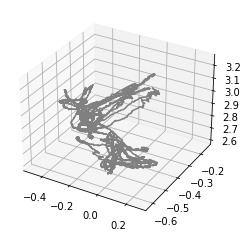

In [16]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

i=0
# Data for a three-dimensional line
zline = recon_skeleton[:,i,2]
xline = recon_skeleton[:,i,0]
yline = recon_skeleton[:,i,1]
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points

#ax.scatter3D(xline, yline, zline, c=zline, cmap='Greens');

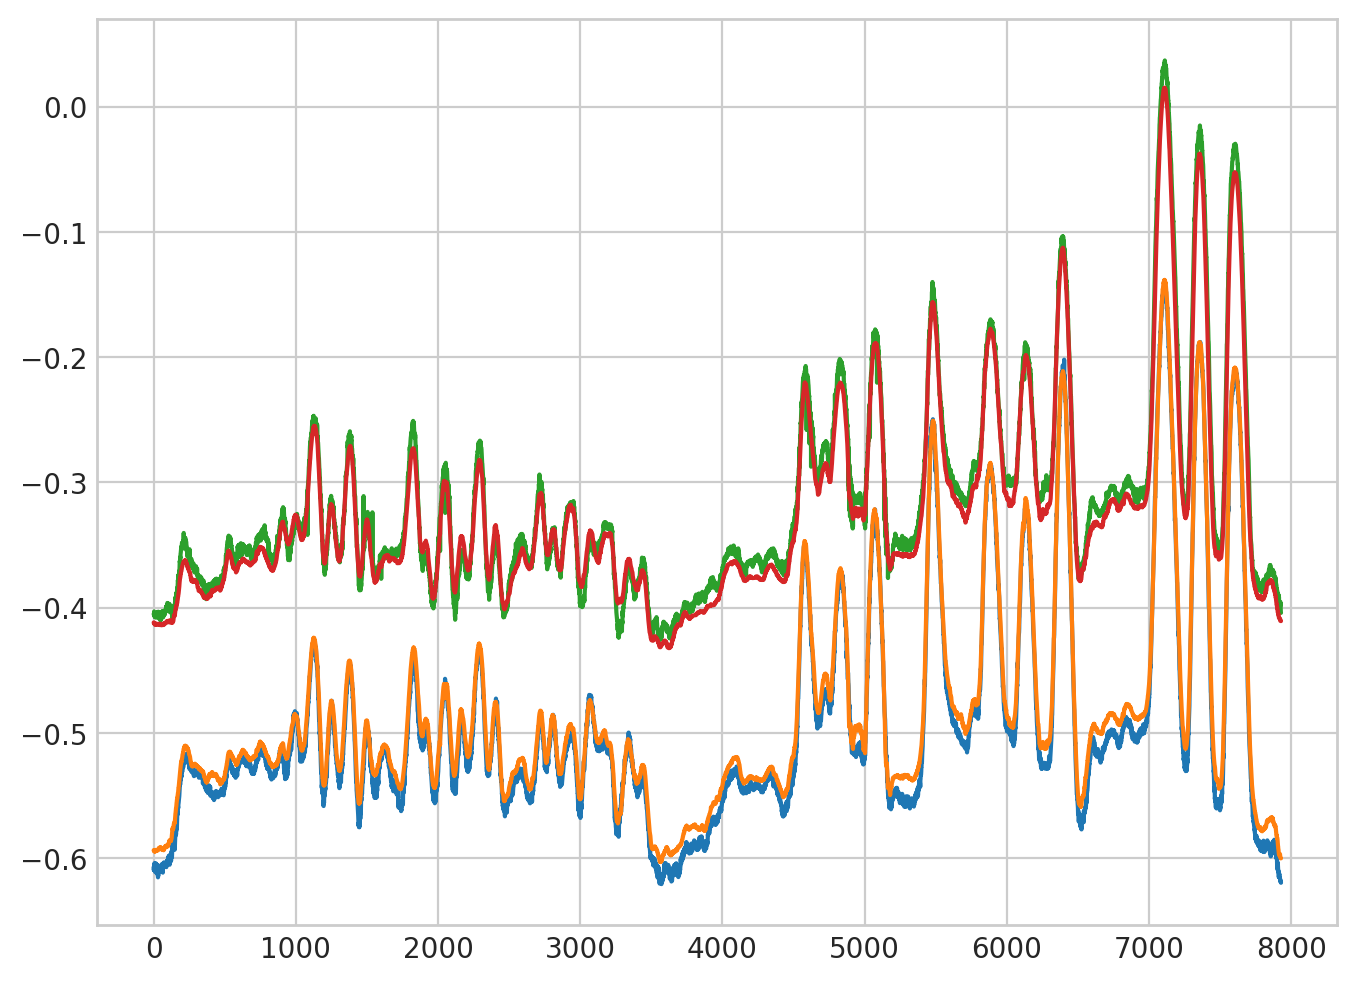

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure(figsize=(8, 6), dpi=200)

ax = plt.axes()
frame=range(0,x_recon.size)
for i in range(2):
    x_recon = recon_skeleton[:,i,1]
    ax.plot(frame,x_recon)
    x_smpl= smpl_skeleton[:,i,1]
    ax.plot(frame,x_smpl)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure(figsize=(8, 6), dpi=200)
nrow = 5; ncol = 5;
fig, axs = plt.subplots(nrows=nrow, ncols=ncol)
frame=range(0,x_recon.size)
for ax in axs.reshape(-1): 
    ax.set_ylabel(str(i))
    ax.settitle

fig, axs = plt.subplots(5, 5)

#size frame joint axis, (7929, 25, 3)
axs[0, 0].plot(frame, recon_skeleton[:,0,:])
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')



for i in range(2):
    x_recon = recon_skeleton[:,i,1]
    ax.plot(frame,x_recon)
    x_smpl= smpl_skeleton[:,i,1]
    ax.plot(frame,x_smpl)

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<Figure size 40000x40000 with 0 Axes>

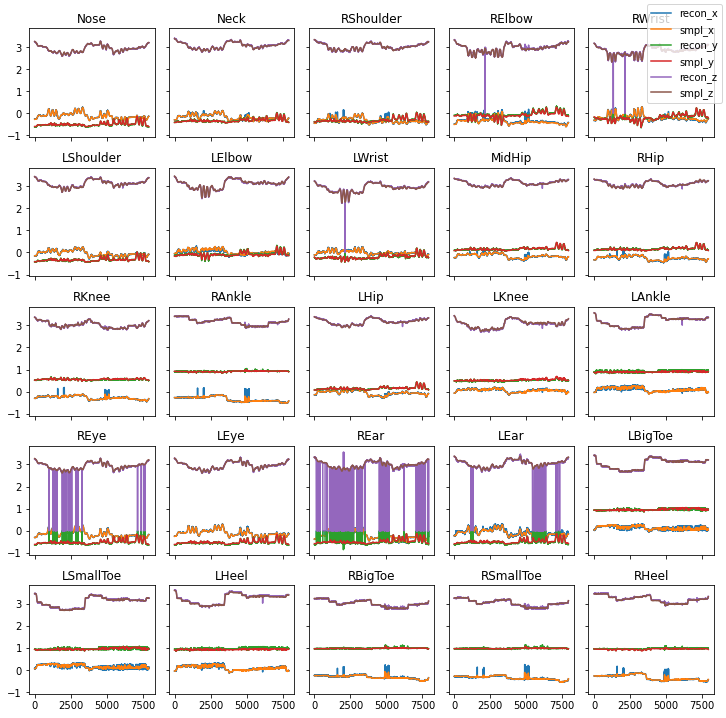

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure(figsize=(200, 200), dpi=200)
nrow = 5; ncol = 5;
fig, axs = plt.subplots(nrows=nrow, ncols=ncol,  sharex=True, sharey=True, figsize = (10,10))
frame=range(0,recon_skeleton.shape[0])
#BODY 25 mapping dictionary
BODY25=['Nose', 'Neck', 'RShoulder', 'RElbow', 'RWrist', 'LShoulder', 'LElbow', 'LWrist', 'MidHip', 'RHip', 'RKnee', 'RAnkle', 'LHip', 'LKnee', 'LAnkle', 'REye', 'LEye', 'REar', 'LEar', 'LBigToe', 'LSmallToe', 'LHeel', 'RBigToe', 'RSmallToe', 'RHeel', 'Background']
#iterate subplots for all 25 body joints in x, y ,z coordinates

for i in range(0,25):
    axs[i//ncol, i%ncol].plot(frame, recon_skeleton[:,i,0], label='recon_x')
    axs[i//ncol, i%ncol].plot(frame, smpl_skeleton[:,i,0], label='smpl_x')
    axs[i//ncol, i%ncol].plot(frame, recon_skeleton[:,i,1], label='recon_y')
    axs[i//ncol, i%ncol].plot(frame, smpl_skeleton[:,i,1], label='smpl_y')
    axs[i//ncol, i%ncol].plot(frame, recon_skeleton[:,i,2], label='recon_z')
    axs[i//ncol, i%ncol].plot(frame, smpl_skeleton[:,i,2], label='smpl_z')  
    axs[i//ncol, i%ncol].set_title(BODY25[i])
    handles, labels = axs[i//ncol, i%ncol].get_legend_handles_labels()
    #print(labels)

    #axs[i//ncol, i%ncol].legend()
#or ax in fig.get_axes():
#   ax.label_outer()
#handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout()
#plt.savefig('quantative.png')

In [11]:
velocity_recon_skeleton = np.sqrt(np.sum(np.square(np.diff(recon_skeleton, axis=0)), axis=2))
velocity_smpl_skeleton = np.sqrt(np.sum(np.square(np.diff(smpl_skeleton, axis=0)), axis=2))
velocity_recon_skeleton.shape

(7928, 25)

In [24]:
velocity_recon_skeleton[:,i].shape

(7928,)

['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']
['velocity_recon', 'velocity_smpl']


<Figure size 10000x10000 with 0 Axes>

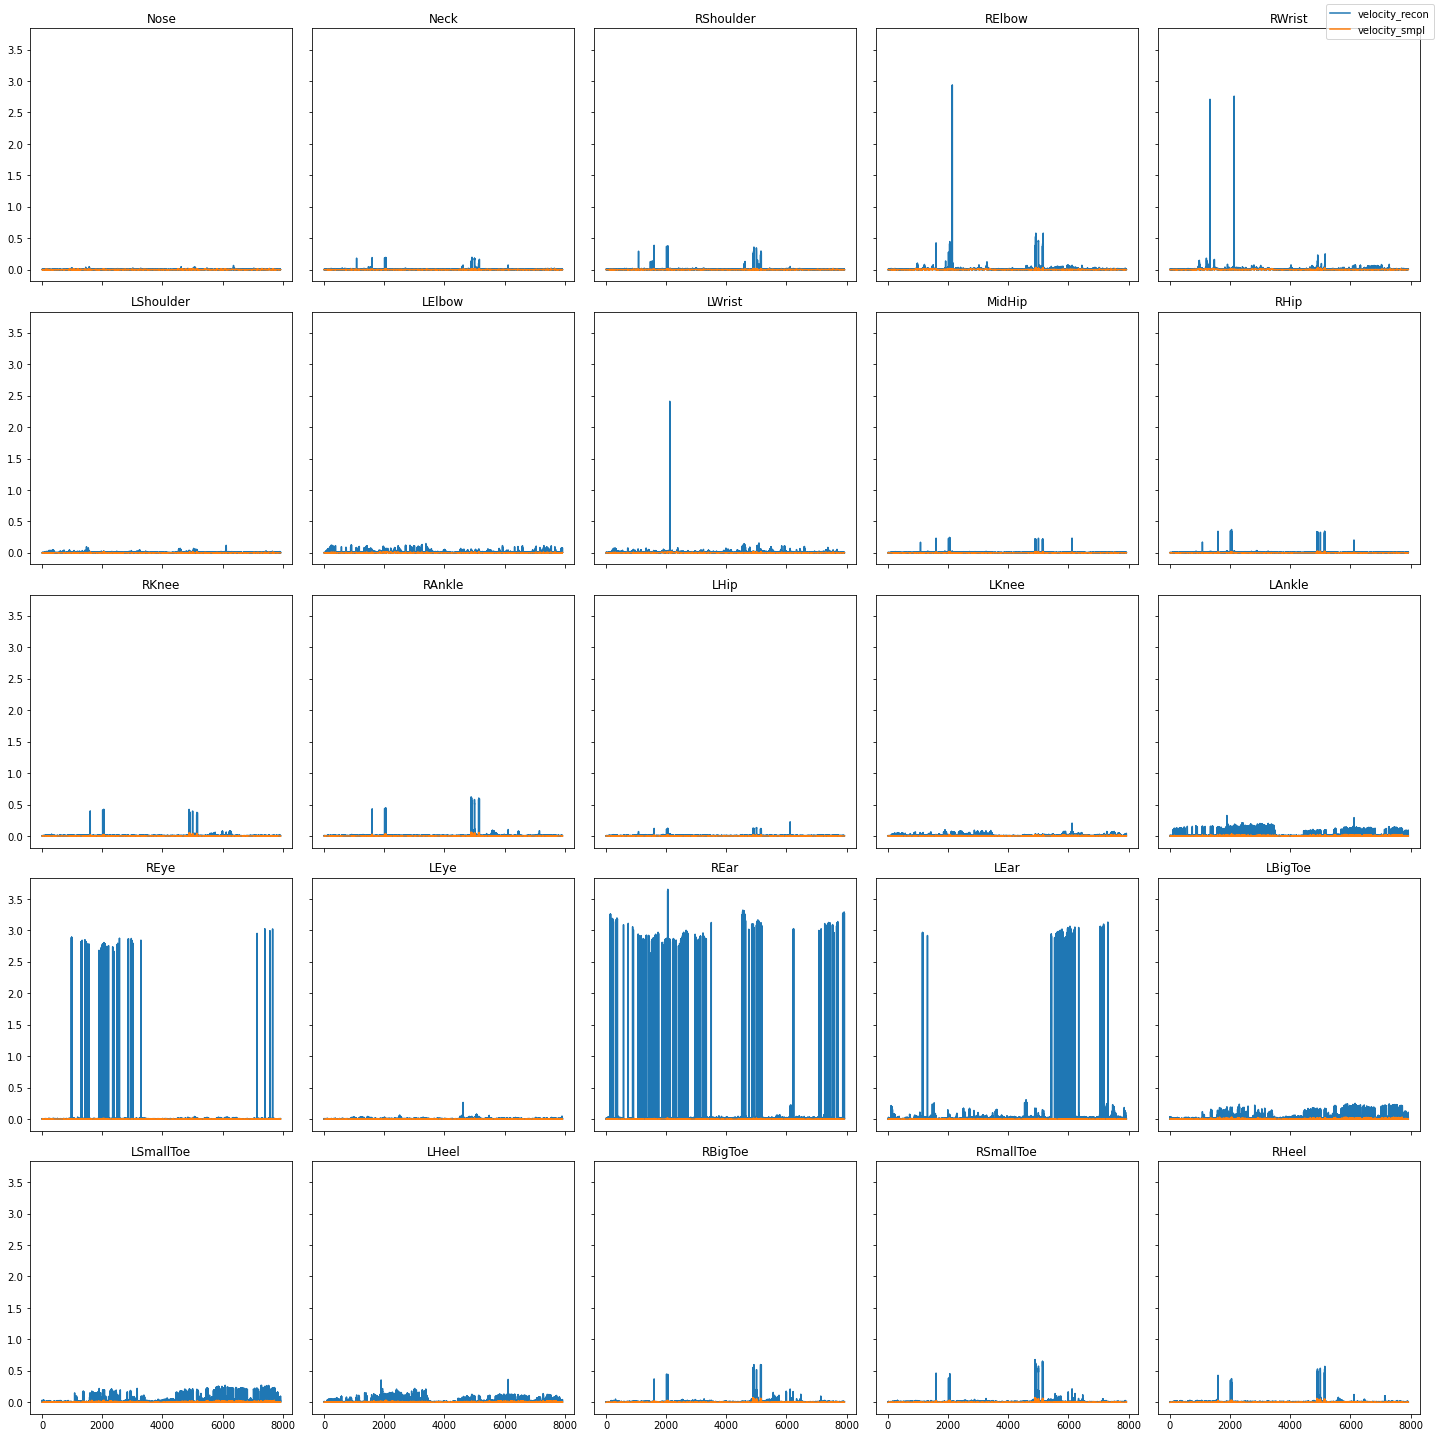

In [29]:
velocity_recon_skeleton = np.sqrt(np.sum(np.square(np.diff(recon_skeleton, axis=0)), axis=2))
velocity_smpl_skeleton = np.sqrt(np.sum(np.square(np.diff(smpl_skeleton, axis=0)), axis=2))
#plot the velocity of each joint in BODY25
fig = plt.figure(figsize=(50, 50), dpi=200)
velocity_frame=range(0,velocity_recon_skeleton[:,0].size)
#ax.plot(velocity_frame, velocity_recon_skeleton, label='recon_velocity')
#ax.plot(velocity_frame, velocity_smpl_skeleton, label='smpl_velocity')

fig, axs = plt.subplots(nrows=nrow, ncols=ncol,  sharex=True, sharey=True, figsize = (20,20))
for i in range(0,25):
    axs[i//ncol, i%ncol].plot(velocity_frame, velocity_recon_skeleton[:,i], label='velocity_recon')
    axs[i//ncol, i%ncol].plot(velocity_frame, velocity_smpl_skeleton[:,i], label='velocity_smpl') 
    axs[i//ncol, i%ncol].set_title(BODY25[i])
    handles, labels = axs[i//ncol, i%ncol].get_legend_handles_labels()
    print(labels)
fig.legend(handles, labels, loc='upper right')
plt.tight_layout()

In [32]:
#calulate the velocity of the each joint in BOPDY25, time interval is 1/240s
recon_skeleton_velocity = np.zeros((recon_skeleton.shape[0]-1,25,3))
for i in range(0,25):
    for j in range(0,3):
        recon_skeleton_velocity[:,i,j] = np.diff(recon_skeleton[:,i,j])/0.004166666666666667
#calulate the acceleration of the each joint in BOPDY25, time interval is 1/240s
recon_skeleton_acceleration = np.zeros((recon_skeleton.shape[0]-2,25,3))
for i in range(0,25):
    for j in range(0,3):
        recon_skeleton_acceleration[:,i,j] = np.diff(recon_skeleton_velocity[:,i,j])/0.004166666666666667
        
smpl_skeleton_velocity = np.zeros((smpl_skeleton.shape[0]-1,25,3))
for i in range(0,25):
    for j in range(0,3):
        smpl_skeleton_velocity[:,i,j] = np.diff(smpl_skeleton[:,i,j])/0.004166666666666667
#calulate the acceleration of the each joint in BOPDY25, time interval is 1/240s
smpl_skeleton_acceleration = np.zeros((smpl_skeleton.shape[0]-2,25,3))
for i in range(0,25):
    for j in range(0,3):
        smpl_skeleton_acceleration[:,i,j] = np.diff(smpl_skeleton_velocity[:,i,j])/0.004166666666666667

['recon_x_velocity', 'smpl_x_velocity', 'recon_y_velocity', 'smpl_y_velocity', 'recon_z_velocity', 'smpl_z_velocity']
['recon_x_velocity', 'smpl_x_velocity', 'recon_y_velocity', 'smpl_y_velocity', 'recon_z_velocity', 'smpl_z_velocity']
['recon_x_velocity', 'smpl_x_velocity', 'recon_y_velocity', 'smpl_y_velocity', 'recon_z_velocity', 'smpl_z_velocity']
['recon_x_velocity', 'smpl_x_velocity', 'recon_y_velocity', 'smpl_y_velocity', 'recon_z_velocity', 'smpl_z_velocity']
['recon_x_velocity', 'smpl_x_velocity', 'recon_y_velocity', 'smpl_y_velocity', 'recon_z_velocity', 'smpl_z_velocity']
['recon_x_velocity', 'smpl_x_velocity', 'recon_y_velocity', 'smpl_y_velocity', 'recon_z_velocity', 'smpl_z_velocity']
['recon_x_velocity', 'smpl_x_velocity', 'recon_y_velocity', 'smpl_y_velocity', 'recon_z_velocity', 'smpl_z_velocity']
['recon_x_velocity', 'smpl_x_velocity', 'recon_y_velocity', 'smpl_y_velocity', 'recon_z_velocity', 'smpl_z_velocity']
['recon_x_velocity', 'smpl_x_velocity', 'recon_y_velocit

<Figure size 40000x40000 with 0 Axes>

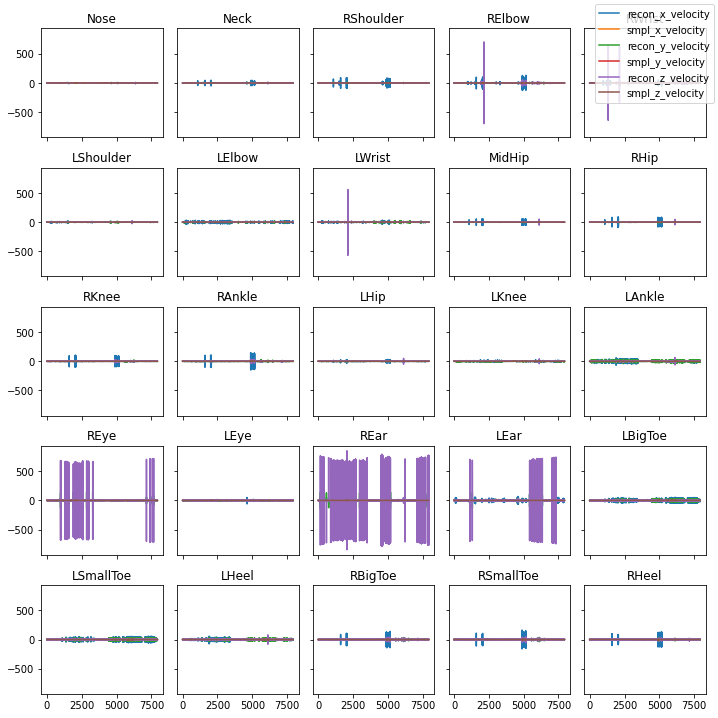

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure(figsize=(200, 200), dpi=200)
nrow = 5; ncol = 5;
fig, axs = plt.subplots(nrows=nrow, ncols=ncol,  sharex=True, sharey=True, figsize = (10,10))
frame=range(0,recon_skeleton_velocity.shape[0])
#BODY 25 mapping dictionary
BODY25=['Nose', 'Neck', 'RShoulder', 'RElbow', 'RWrist', 'LShoulder', 'LElbow', 'LWrist', 'MidHip', 'RHip', 'RKnee', 'RAnkle', 'LHip', 'LKnee', 'LAnkle', 'REye', 'LEye', 'REar', 'LEar', 'LBigToe', 'LSmallToe', 'LHeel', 'RBigToe', 'RSmallToe', 'RHeel', 'Background']
#iterate subplots for all 25 body joints in x, y ,z coordinates

for i in range(0,25):
    axs[i//ncol, i%ncol].plot(frame, recon_skeleton_velocity[:,i,0], label='recon_x_velocity')
    axs[i//ncol, i%ncol].plot(frame, smpl_skeleton_velocity[:,i,0], label='smpl_x_velocity')
    axs[i//ncol, i%ncol].plot(frame, recon_skeleton_velocity[:,i,1], label='recon_y_velocity')
    axs[i//ncol, i%ncol].plot(frame, smpl_skeleton_velocity[:,i,1], label='smpl_y_velocity')
    axs[i//ncol, i%ncol].plot(frame, recon_skeleton_velocity[:,i,2], label='recon_z_velocity')
    axs[i//ncol, i%ncol].plot(frame, smpl_skeleton_velocity[:,i,2], label='smpl_z_velocity')  
    axs[i//ncol, i%ncol].set_title(BODY25[i])
    handles, labels = axs[i//ncol, i%ncol].get_legend_handles_labels()
    print(labels)

    #axs[i//ncol, i%ncol].legend()
#or ax in fig.get_axes():
#   ax.label_outer()
#handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout()
plt.savefig('quantative_velocity.png')

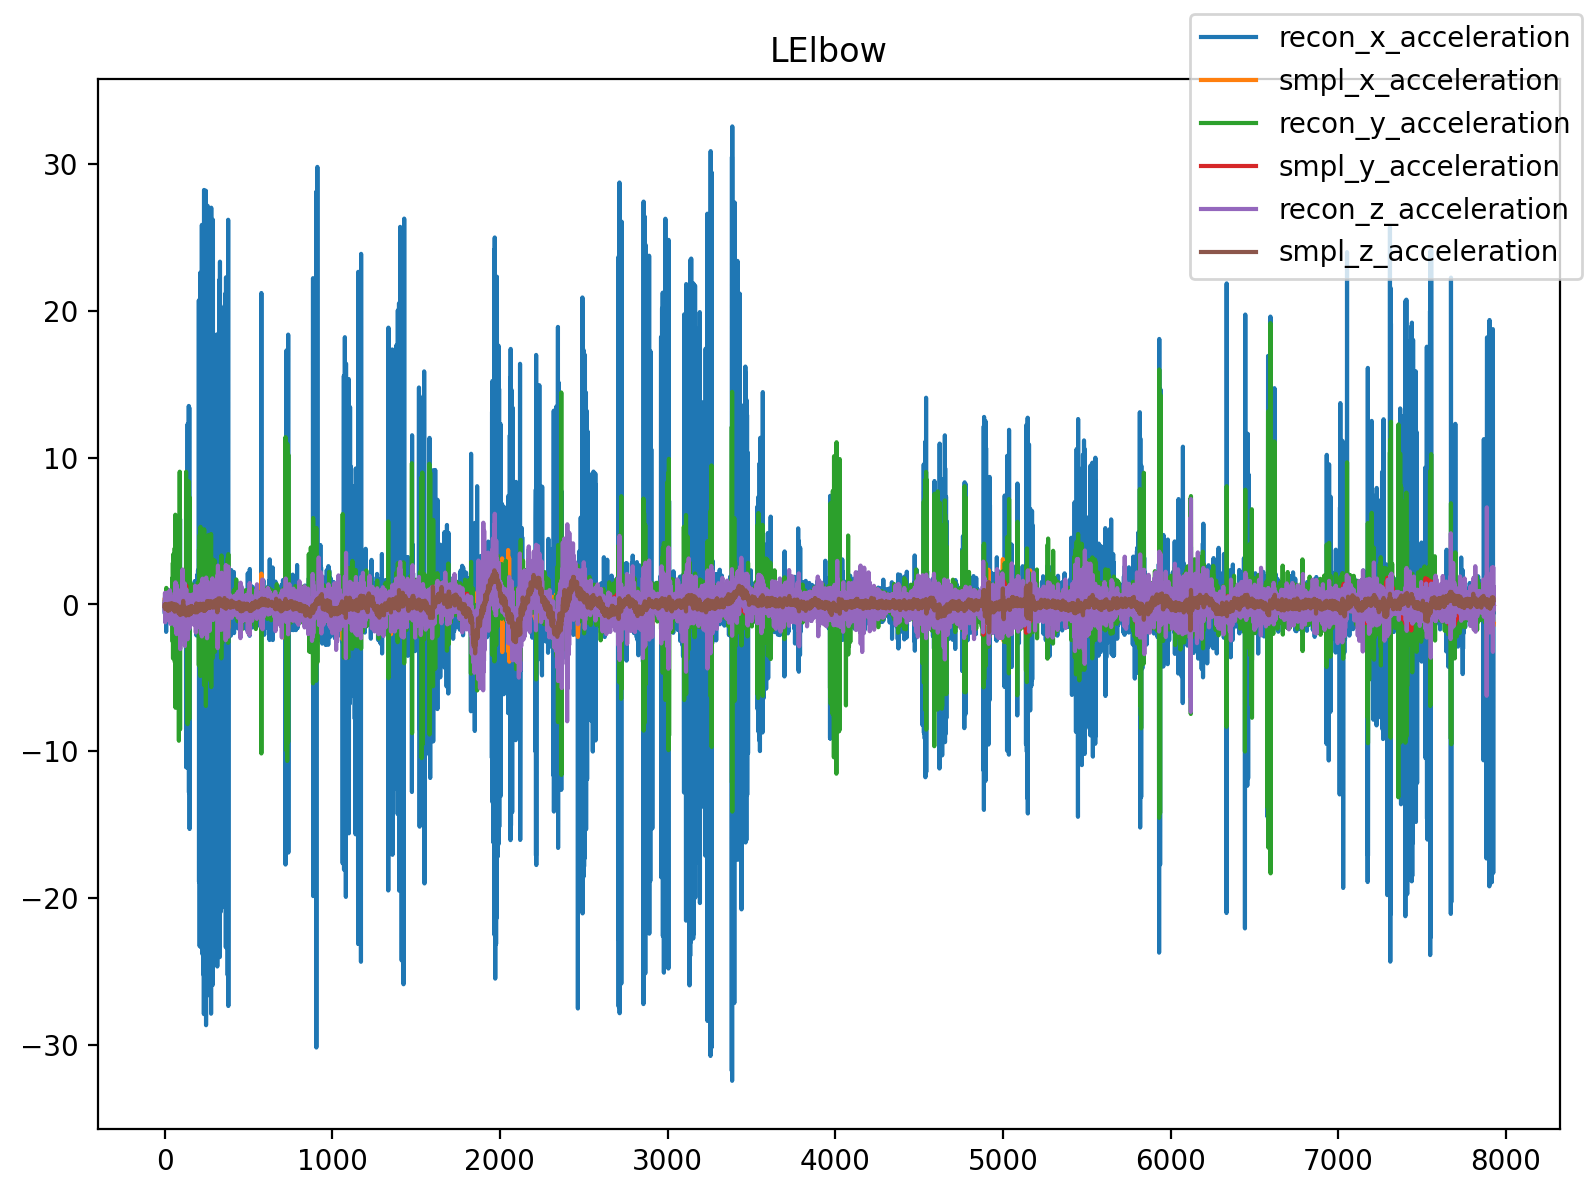

In [48]:
#plot one to check
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure(figsize=(8, 6), dpi=200)

ax = plt.axes()
frame=range(0,recon_skeleton_velocity.shape[0])
ax.plot(frame, recon_skeleton_velocity[:,6,0], label='recon_x_velocity')
ax.plot(frame, smpl_skeleton_velocity[:,6,0], label='smpl_x_velocity')
ax.plot(frame, recon_skeleton_velocity[:,6,1], label='recon_y_velocity')
ax.plot(frame, smpl_skeleton_velocity[:,6,1], label='smpl_y_velocity')
ax.plot(frame, recon_skeleton_velocity[:,6,2], label='recon_z_velocity')
ax.plot(frame, smpl_skeleton_velocity[:,6,2], label='smpl_z_velocity')  
ax.set_title(BODY25[6])
fig.legend(handles, labels, loc='upper right')
plt.tight_layout()
plt.savefig('quantative_velocity_LElbow.png')

['recon_x_acceleration', 'smpl_x_acceleration', 'recon_y_acceleration', 'smpl_y_acceleration', 'recon_z_acceleration', 'smpl_z_acceleration']
['recon_x_acceleration', 'smpl_x_acceleration', 'recon_y_acceleration', 'smpl_y_acceleration', 'recon_z_acceleration', 'smpl_z_acceleration']
['recon_x_acceleration', 'smpl_x_acceleration', 'recon_y_acceleration', 'smpl_y_acceleration', 'recon_z_acceleration', 'smpl_z_acceleration']
['recon_x_acceleration', 'smpl_x_acceleration', 'recon_y_acceleration', 'smpl_y_acceleration', 'recon_z_acceleration', 'smpl_z_acceleration']
['recon_x_acceleration', 'smpl_x_acceleration', 'recon_y_acceleration', 'smpl_y_acceleration', 'recon_z_acceleration', 'smpl_z_acceleration']
['recon_x_acceleration', 'smpl_x_acceleration', 'recon_y_acceleration', 'smpl_y_acceleration', 'recon_z_acceleration', 'smpl_z_acceleration']
['recon_x_acceleration', 'smpl_x_acceleration', 'recon_y_acceleration', 'smpl_y_acceleration', 'recon_z_acceleration', 'smpl_z_acceleration']
['reco

<Figure size 40000x40000 with 0 Axes>

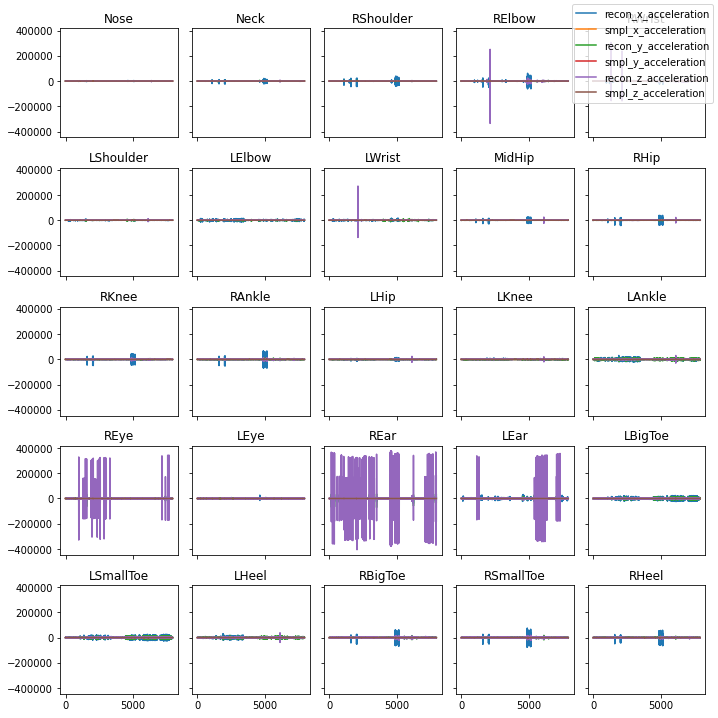

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure(figsize=(200, 200), dpi=200)
nrow = 5; ncol = 5;
fig, axs = plt.subplots(nrows=nrow, ncols=ncol,  sharex=True, sharey=True, figsize = (10,10))
frame=range(0,recon_skeleton_acceleration.shape[0])
#BODY 25 mapping dictionary
BODY25=['Nose', 'Neck', 'RShoulder', 'RElbow', 'RWrist', 'LShoulder', 'LElbow', 'LWrist', 'MidHip', 'RHip', 'RKnee', 'RAnkle', 'LHip', 'LKnee', 'LAnkle', 'REye', 'LEye', 'REar', 'LEar', 'LBigToe', 'LSmallToe', 'LHeel', 'RBigToe', 'RSmallToe', 'RHeel', 'Background']
#iterate subplots for all 25 body joints in x, y ,z coordinates

for i in range(0,25):
    axs[i//ncol, i%ncol].plot(frame, recon_skeleton_acceleration[:,i,0], label='recon_x_acceleration')
    axs[i//ncol, i%ncol].plot(frame, smpl_skeleton_acceleration[:,i,0], label='smpl_x_acceleration')
    axs[i//ncol, i%ncol].plot(frame, recon_skeleton_acceleration[:,i,1], label='recon_y_acceleration')
    axs[i//ncol, i%ncol].plot(frame, smpl_skeleton_acceleration[:,i,1], label='smpl_y_acceleration')
    axs[i//ncol, i%ncol].plot(frame, recon_skeleton_acceleration[:,i,2], label='recon_z_acceleration')
    axs[i//ncol, i%ncol].plot(frame, smpl_skeleton_acceleration[:,i,2], label='smpl_z_acceleration')  
    axs[i//ncol, i%ncol].set_title(BODY25[i])
    handles, labels = axs[i//ncol, i%ncol].get_legend_handles_labels()
    print(labels)

    #axs[i//ncol, i%ncol].legend()
#or ax in fig.get_axes():
#   ax.label_outer()
#handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout()
plt.savefig('quantative_acceleration.png')

<Figure size 40000x40000 with 0 Axes>

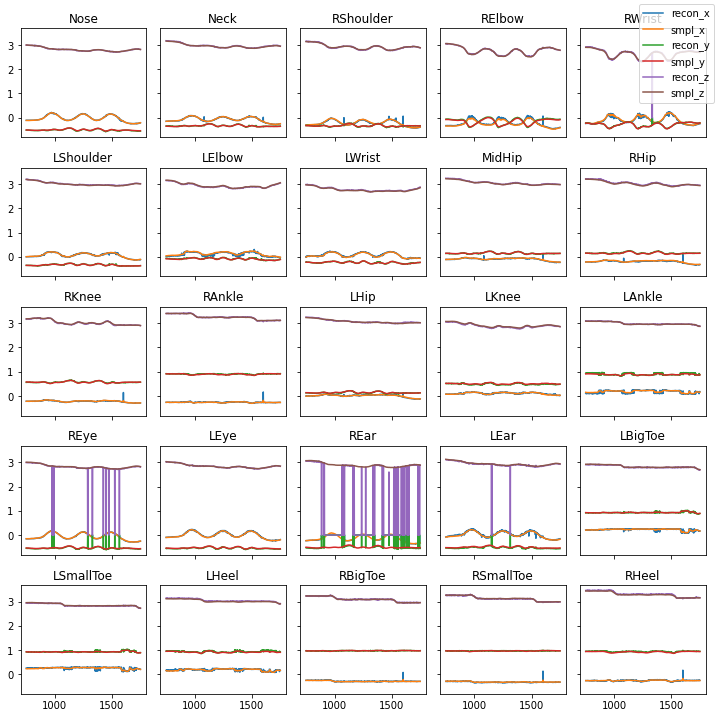

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure(figsize=(200, 200), dpi=200)
nrow = 5 
ncol = 5
fig, axs = plt.subplots(nrows=nrow, ncols=ncol,  sharex=True, sharey=True, figsize = (10,10))
#recon_skeleton.shape (7929, 25, 3)
frame=range(0,recon_skeleton.shape[0])
start=750
end=1750
step=1
#BODY 25 mapping dictionary
BODY25=['Nose', 'Neck', 'RShoulder', 'RElbow', 'RWrist', 'LShoulder', 'LElbow', 'LWrist', 'MidHip', 'RHip', 'RKnee', 'RAnkle', 'LHip', 'LKnee', 'LAnkle', 'REye', 'LEye', 'REar', 'LEar', 'LBigToe', 'LSmallToe', 'LHeel', 'RBigToe', 'RSmallToe', 'RHeel', 'Background']
#iterate subplots for all 25 body joints in x, y ,z coordinates

for i in range(0,25):
    axs[i//ncol, i%ncol].plot(frame[start:end:step], recon_skeleton[start:end:step,i,0], label='recon_x')
    axs[i//ncol, i%ncol].plot(frame[start:end:step], smpl_skeleton[start:end:step,i,0], label='smpl_x')
    axs[i//ncol, i%ncol].plot(frame[start:end:step], recon_skeleton[start:end:step,i,1], label='recon_y')
    axs[i//ncol, i%ncol].plot(frame[start:end:step], smpl_skeleton[start:end:step,i,1], label='smpl_y')
    axs[i//ncol, i%ncol].plot(frame[start:end:step], recon_skeleton[start:end:step,i,2], label='recon_z')
    axs[i//ncol, i%ncol].plot(frame[start:end:step], smpl_skeleton[start:end:step,i,2], label='smpl_z')  
    axs[i//ncol, i%ncol].set_title(BODY25[i])
    handles, labels = axs[i//ncol, i%ncol].get_legend_handles_labels()
    #print(labels)

    #axs[i//ncol, i%ncol].legend()
#or ax in fig.get_axes():
#   ax.label_outer()
#handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout()
#plt.savefig('quantative.png')

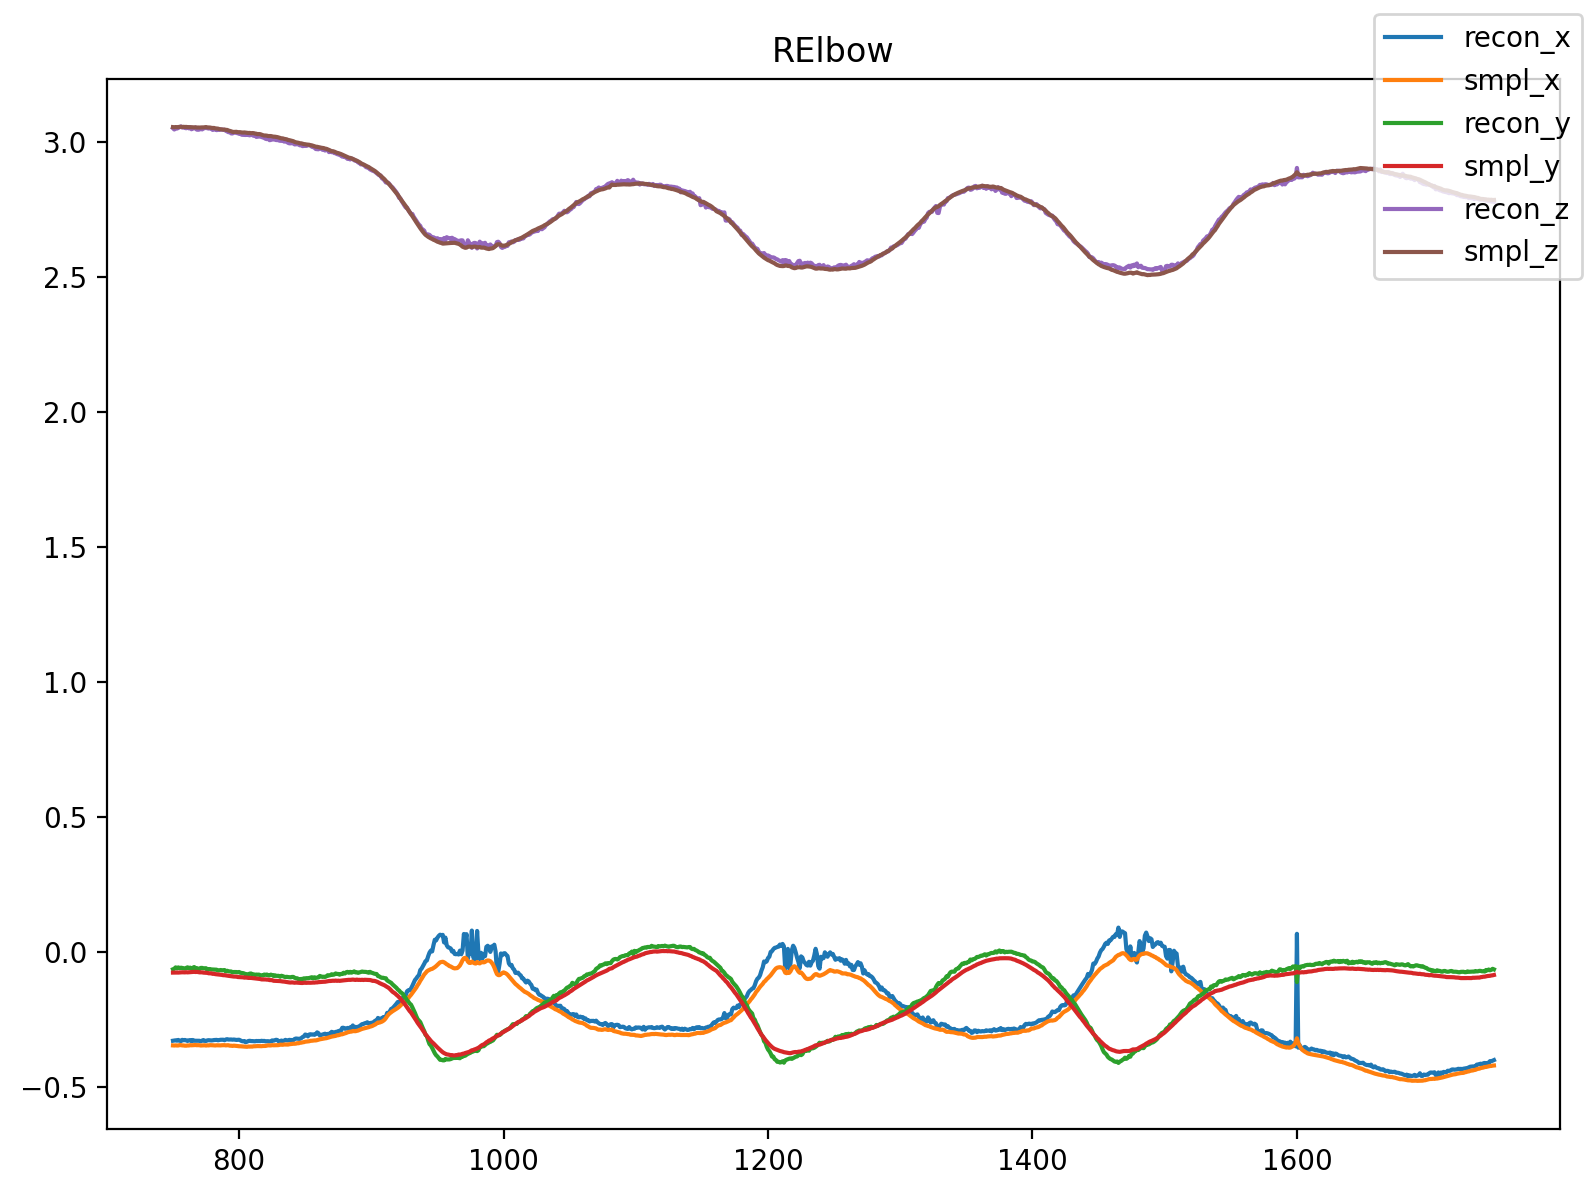

In [39]:
#plot one to check
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure(figsize=(8, 6), dpi=200)

axs = plt.axes()
frame=range(0,recon_skeleton.shape[0])
i=3
axs.plot(frame[start:end:step], recon_skeleton[start:end:step,i,0], label='recon_x')
axs.plot(frame[start:end:step], smpl_skeleton[start:end:step,i,0], label='smpl_x')
axs.plot(frame[start:end:step], recon_skeleton[start:end:step,i,1], label='recon_y')
axs.plot(frame[start:end:step], smpl_skeleton[start:end:step,i,1], label='smpl_y')
axs.plot(frame[start:end:step], recon_skeleton[start:end:step,i,2], label='recon_z')
axs.plot(frame[start:end:step], smpl_skeleton[start:end:step,i,2], label='smpl_z')  
axs.set_title(BODY25[i])
handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout()
#plt.savefig('quantative_velocity_LElbow.png')

In [37]:
#calulate the velocity of the each joint in BOPDY25, time interval is 1/240s
recon_skeleton_velocity = np.zeros((recon_skeleton.shape[0]-1,25,3))
for i in range(0,25):
    for j in range(0,3):
        recon_skeleton_velocity[:,i,j] = np.diff(recon_skeleton[:,i,j])/0.004166666666666667
#calulate the acceleration of the each joint in BOPDY25, time interval is 1/240s
recon_skeleton_acceleration = np.zeros((recon_skeleton.shape[0]-2,25,3))
for i in range(0,25):
    for j in range(0,3):
        recon_skeleton_acceleration[:,i,j] = np.diff(recon_skeleton_velocity[:,i,j])/0.004166666666666667
        
smpl_skeleton_velocity = np.zeros((smpl_skeleton.shape[0]-1,25,3))
for i in range(0,25):
    for j in range(0,3):
        smpl_skeleton_velocity[:,i,j] = np.diff(smpl_skeleton[:,i,j])/0.004166666666666667
#calulate the acceleration of the each joint in BOPDY25, time interval is 1/240s
smpl_skeleton_acceleration = np.zeros((smpl_skeleton.shape[0]-2,25,3))
for i in range(0,25):
    for j in range(0,3):
        smpl_skeleton_acceleration[:,i,j] = np.diff(smpl_skeleton_velocity[:,i,j])/0.004166666666666667

['recon_x_velocity', 'smpl_x_velocity', 'recon_y_velocity', 'smpl_y_velocity', 'recon_z_velocity', 'smpl_z_velocity']
['recon_x_velocity', 'smpl_x_velocity', 'recon_y_velocity', 'smpl_y_velocity', 'recon_z_velocity', 'smpl_z_velocity']
['recon_x_velocity', 'smpl_x_velocity', 'recon_y_velocity', 'smpl_y_velocity', 'recon_z_velocity', 'smpl_z_velocity']
['recon_x_velocity', 'smpl_x_velocity', 'recon_y_velocity', 'smpl_y_velocity', 'recon_z_velocity', 'smpl_z_velocity']
['recon_x_velocity', 'smpl_x_velocity', 'recon_y_velocity', 'smpl_y_velocity', 'recon_z_velocity', 'smpl_z_velocity']
['recon_x_velocity', 'smpl_x_velocity', 'recon_y_velocity', 'smpl_y_velocity', 'recon_z_velocity', 'smpl_z_velocity']
['recon_x_velocity', 'smpl_x_velocity', 'recon_y_velocity', 'smpl_y_velocity', 'recon_z_velocity', 'smpl_z_velocity']
['recon_x_velocity', 'smpl_x_velocity', 'recon_y_velocity', 'smpl_y_velocity', 'recon_z_velocity', 'smpl_z_velocity']
['recon_x_velocity', 'smpl_x_velocity', 'recon_y_velocit

<Figure size 40000x40000 with 0 Axes>

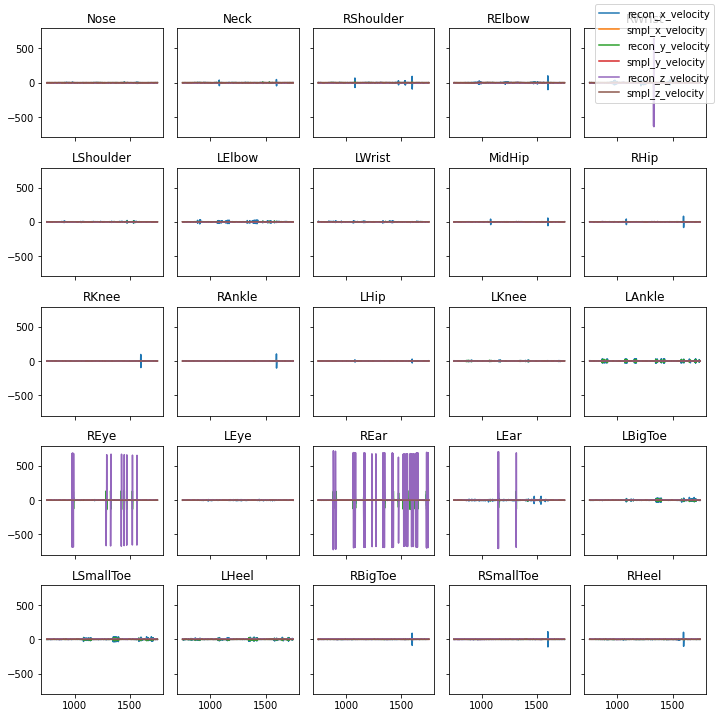

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure(figsize=(200, 200), dpi=200)
nrow = 5; ncol = 5;
fig, axs = plt.subplots(nrows=nrow, ncols=ncol,  sharex=True, sharey=True, figsize = (10,10))
frame=range(0,recon_skeleton_velocity.shape[0])
start=750
end=1750
step=1
#BODY 25 mapping dictionary
BODY25=['Nose', 'Neck', 'RShoulder', 'RElbow', 'RWrist', 'LShoulder', 'LElbow', 'LWrist', 'MidHip', 'RHip', 'RKnee', 'RAnkle', 'LHip', 'LKnee', 'LAnkle', 'REye', 'LEye', 'REar', 'LEar', 'LBigToe', 'LSmallToe', 'LHeel', 'RBigToe', 'RSmallToe', 'RHeel', 'Background']
#iterate subplots for all 25 body joints in x, y ,z coordinates

for i in range(0,25):
    axs[i//ncol, i%ncol].plot(frame[start:end:step], recon_skeleton_velocity[start:end:step,i,0], label='recon_x_velocity')
    axs[i//ncol, i%ncol].plot(frame[start:end:step], smpl_skeleton_velocity[start:end:step,i,0], label='smpl_x_velocity')
    axs[i//ncol, i%ncol].plot(frame[start:end:step], recon_skeleton_velocity[start:end:step,i,1], label='recon_y_velocity')
    axs[i//ncol, i%ncol].plot(frame[start:end:step], smpl_skeleton_velocity[start:end:step,i,1], label='smpl_y_velocity')
    axs[i//ncol, i%ncol].plot(frame[start:end:step], recon_skeleton_velocity[start:end:step,i,2], label='recon_z_velocity')
    axs[i//ncol, i%ncol].plot(frame[start:end:step], smpl_skeleton_velocity[start:end:step,i,2], label='smpl_z_velocity')  
    axs[i//ncol, i%ncol].set_title(BODY25[i])
    handles, labels = axs[i//ncol, i%ncol].get_legend_handles_labels()
    print(labels)

    #axs[i//ncol, i%ncol].legend()
#or ax in fig.get_axes():
#   ax.label_outer()
#handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout()
plt.savefig('quantative_velocity.png')

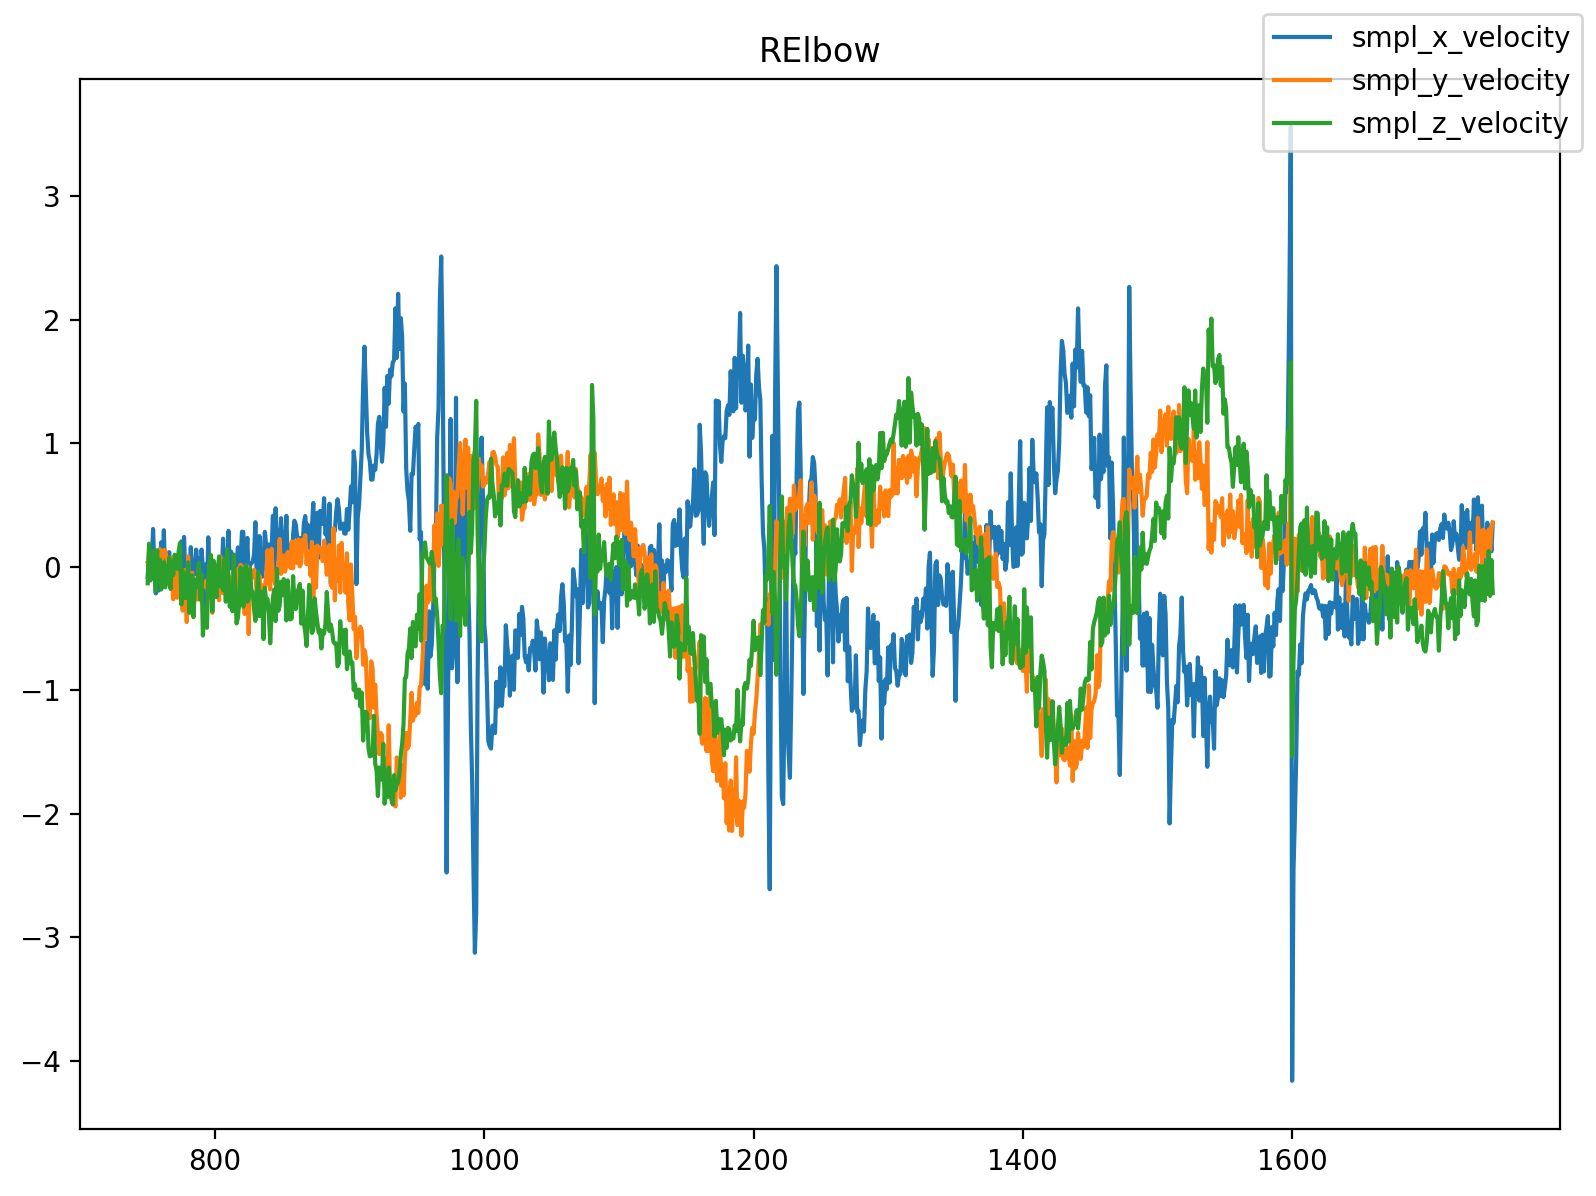

In [47]:
#plot one to check
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure(figsize=(8, 6), dpi=200)

axs = plt.axes()
frame=range(0,recon_skeleton.shape[0])
#BODY 25 mapping dictionary
BODY25=['Nose', 'Neck', 'RShoulder', 'RElbow', 'RWrist', 'LShoulder', 'LElbow', 'LWrist', 'MidHip', 'RHip', 'RKnee', 'RAnkle', 'LHip', 'LKnee', 'LAnkle', 'REye', 'LEye', 'REar', 'LEar', 'LBigToe', 'LSmallToe', 'LHeel', 'RBigToe', 'RSmallToe', 'RHeel', 'Background']
#iterate subplots for all 25 body joints in x, y ,z coordinates
i=3
#axs.plot(frame[start:end:step], recon_skeleton_velocity[start:end:step,i,0], label='recon_x_velocity')
axs.plot(frame[start:end:step], smpl_skeleton_velocity[start:end:step,i,0], label='smpl_x_velocity')
#axs.plot(frame[start:end:step], recon_skeleton_velocity[start:end:step,i,1], label='recon_y_velocity')
axs.plot(frame[start:end:step], smpl_skeleton_velocity[start:end:step,i,1], label='smpl_y_velocity')
#axs.plot(frame[start:end:step], recon_skeleton_velocity[start:end:step,i,2], label='recon_z_velocity')
axs.plot(frame[start:end:step], smpl_skeleton_velocity[start:end:step,i,2], label='smpl_z_velocity')  
axs.set_title(BODY25[i])
handles, labels = axs.get_legend_handles_labels()

    #axs[i//ncol, i%ncol].legend()
#or ax in fig.get_axes():
#   ax.label_outer()
#handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout()
plt.savefig('quantative_velocity.png')

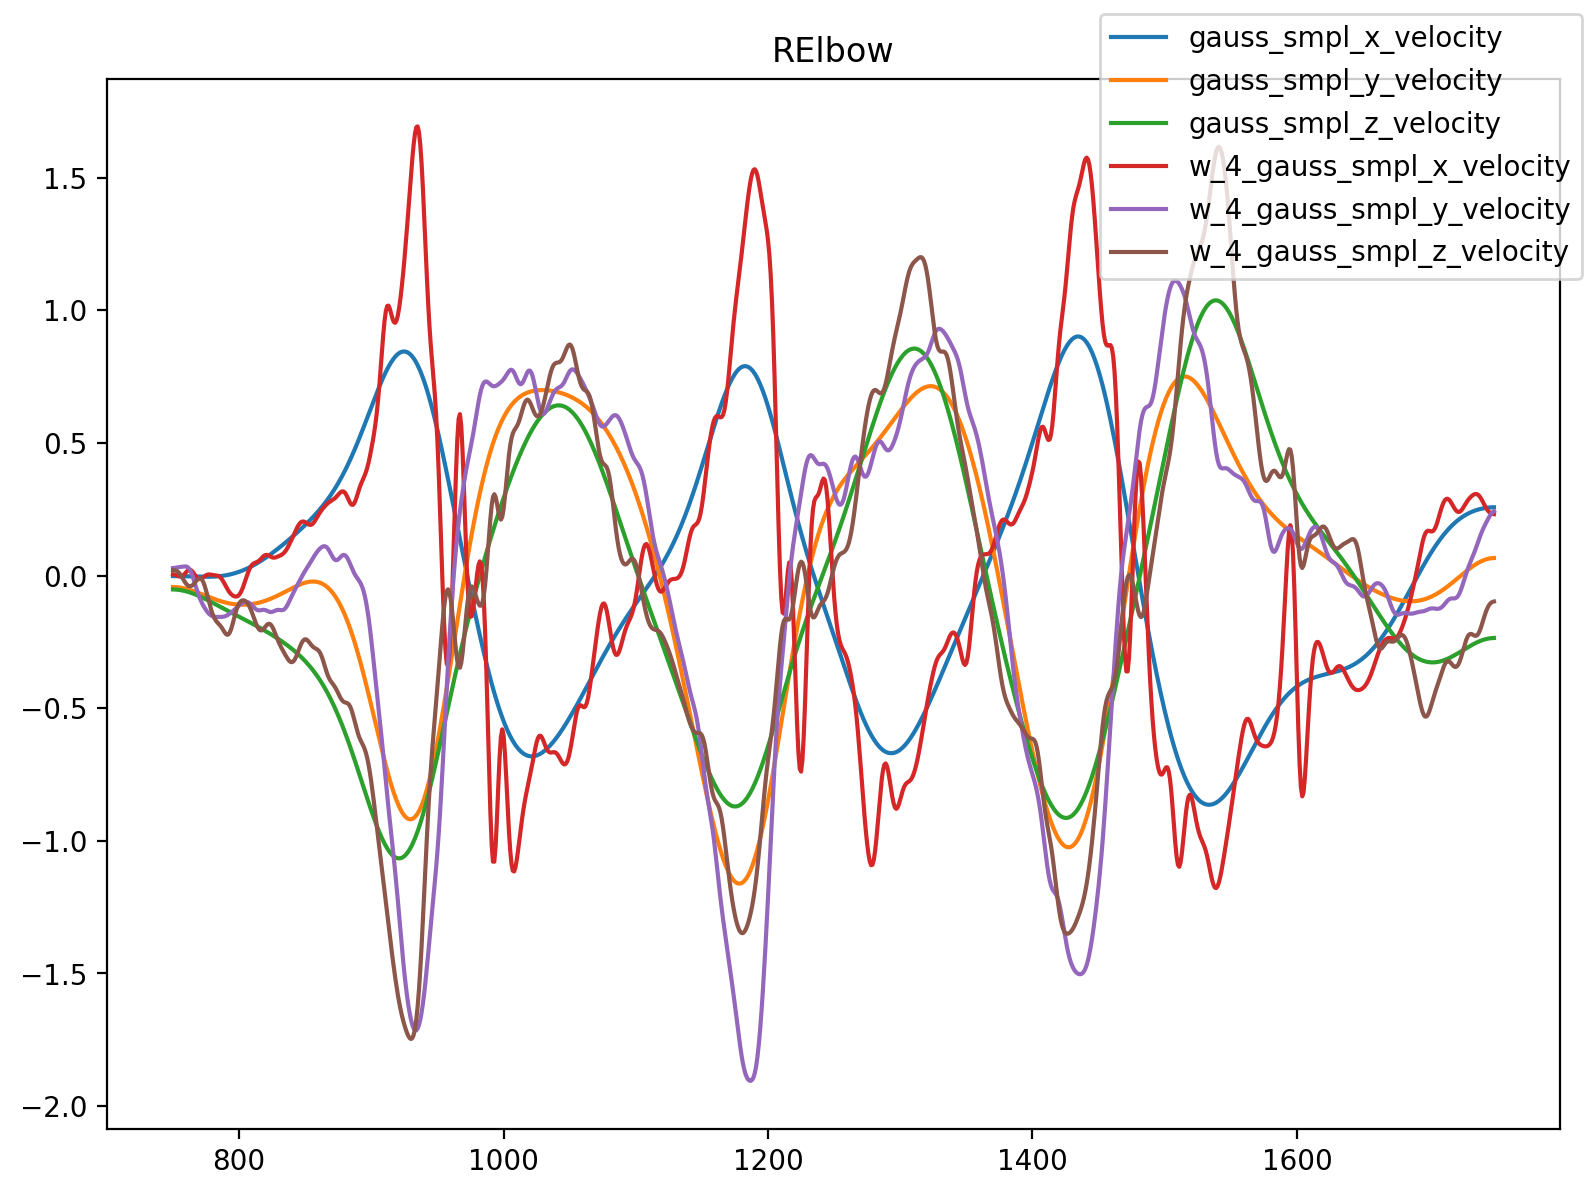

In [52]:
#plot one to check
%matplotlib inline
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure(figsize=(8, 6), dpi=200)

axs = plt.axes()
frame=range(0,recon_skeleton.shape[0])
#BODY 25 mapping dictionary
BODY25=['Nose', 'Neck', 'RShoulder', 'RElbow', 'RWrist', 'LShoulder', 'LElbow', 'LWrist', 'MidHip', 'RHip', 'RKnee', 'RAnkle', 'LHip', 'LKnee', 'LAnkle', 'REye', 'LEye', 'REar', 'LEar', 'LBigToe', 'LSmallToe', 'LHeel', 'RBigToe', 'RSmallToe', 'RHeel', 'Background']
#iterate subplots for all 25 body joints in x, y ,z coordinates
i=3
#axs.plot(frame[start:end:step], recon_skeleton_velocity[start:end:step,i,0], label='recon_x_velocity')
axs.plot(frame[start:end:step], gaussian_filter1d(smpl_skeleton_velocity[start:end:step,i,0], sigma=24, axis=0), label='gauss_smpl_x_velocity')
#axs.plot(frame[start:end:step], recon_skeleton_velocity[start:end:step,i,1], label='recon_y_velocity')
axs.plot(frame[start:end:step], gaussian_filter1d(smpl_skeleton_velocity[start:end:step,i,1],sigma=24, axis=0), label='gauss_smpl_y_velocity')
#axs.plot(frame[start:end:step], recon_skeleton_velocity[start:end:step,i,2], label='recon_z_velocity')
axs.plot(frame[start:end:step], gaussian_filter1d(smpl_skeleton_velocity[start:end:step,i,2],sigma=24, axis=0), label='gauss_smpl_z_velocity')  
axs.plot(frame[start:end:step], gaussian_filter1d(smpl_skeleton_velocity[start:end:step,i,0], sigma=4, axis=0), label='w_4_gauss_smpl_x_velocity')
#axs.plot(frame[start:end:step], recon_skeleton_velocity[start:end:step,i,1], label='recon_y_velocity')
axs.plot(frame[start:end:step], gaussian_filter1d(smpl_skeleton_velocity[start:end:step,i,1],sigma=4, axis=0), label='w_4_gauss_smpl_y_velocity')
#axs.plot(frame[start:end:step], recon_skeleton_velocity[start:end:step,i,2], label='recon_z_velocity')
axs.plot(frame[start:end:step], gaussian_filter1d(smpl_skeleton_velocity[start:end:step,i,2],sigma=4, axis=0), label='w_4_gauss_smpl_z_velocity')  

axs.set_title(BODY25[i])
handles, labels = axs.get_legend_handles_labels()

    #axs[i//ncol, i%ncol].legend()
#or ax in fig.get_axes():
#   ax.label_outer()
#handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout()
#plt.savefig('quantative_velocity.png')